**Ensemble Learning**  
* Combine multiple machine learning algorithms to come up with final estimate.  
* Random forest method is an example - ensemble of trees.  

**Random Forest Intuition**  
1. Pick at random K data points from the Training Set.  
2. Build the Decision Tree associated to these K data points.  
3. Chosse the number Ntree of trees you want to build and repeat steps 1 and 2.  
4. For a new data point - prediction is based on majority.  

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


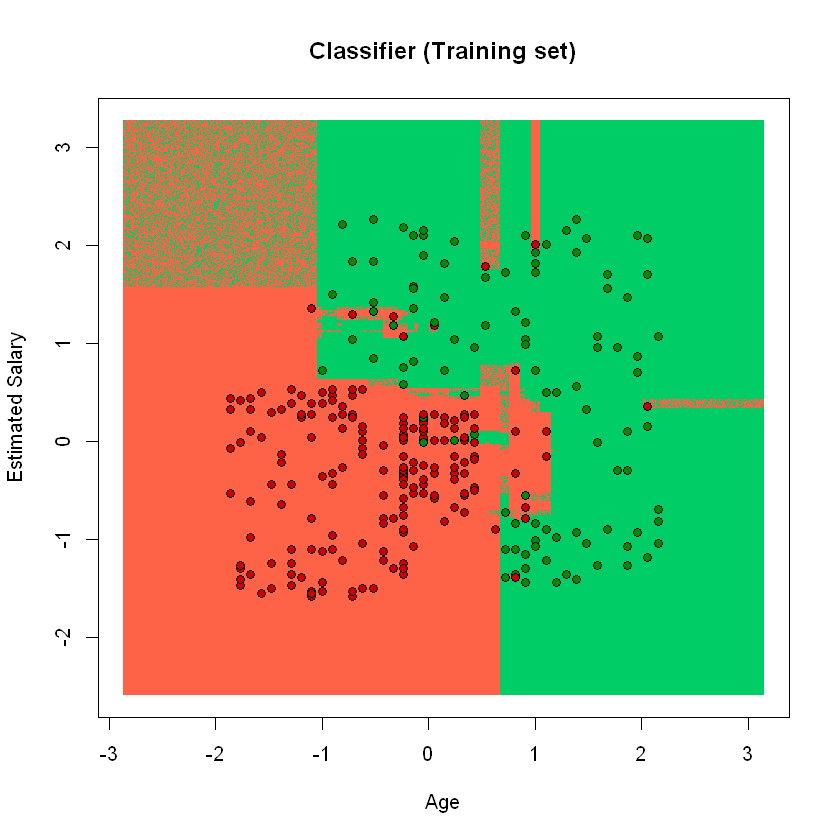

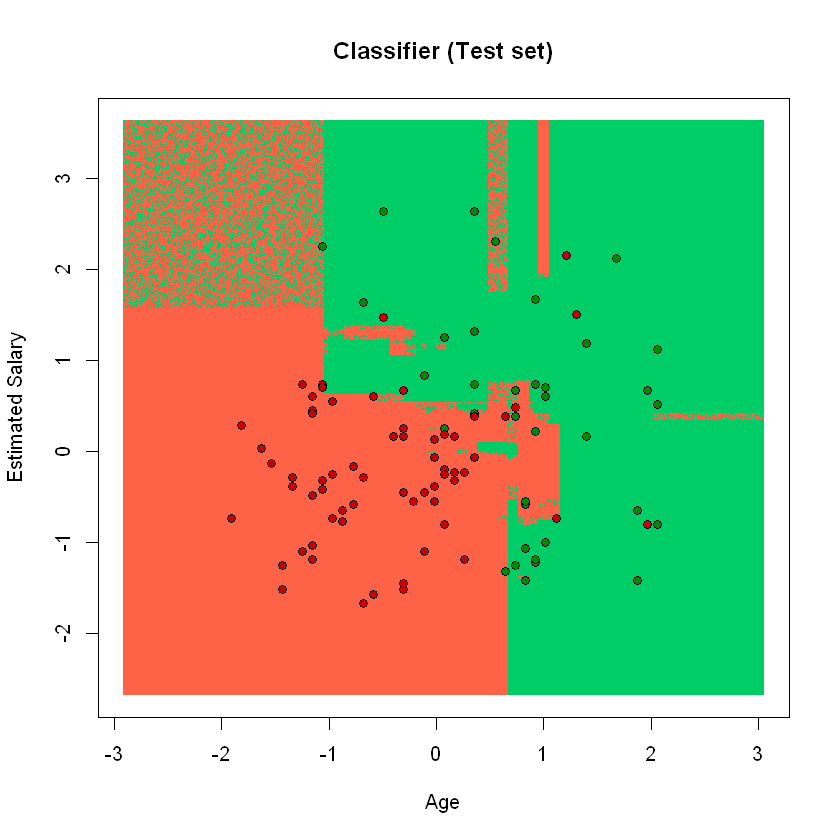

In [2]:
# Classification template

# Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
dataset = dataset[3:5]

# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

# Feature Scaling
training_set[-3] = scale(training_set[-3])
test_set[-3] = scale(test_set[-3])

# Fitting classifier to the Training set
library(randomForest)
classifier <- randomForest(x = training_set[-3],
                          y = training_set$Purchased,
                          ntree = 10)

# Predicting the Test set results
y_pred = predict(classifier, newdata = test_set[-3])

# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred)

# Visualising the Training set results
library(ElemStatLearn)
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3],
     main = 'Classifier (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(classifier, newdata = grid_set)
plot(set[, -3], main = 'Classifier (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

In [3]:
cm

   y_pred
     0  1
  0 59  5
  1  9 27